In [1]:
import pandas as pd
from cluster_calc import *

In [2]:
address = '../data/data_all.pkl'
df = pd.read_pickle(address)
df=df.drop(df[df['Defect Number']<3].index)

In [3]:
df_vac=df[df['Defect Type']=='vac']

In [4]:
def to_feature(atom_obj):
    return circle_radius(find_surface_atom_pos(atom_obj))
df['cluster_radius']=df['Object'].apply(to_feature)

In [5]:
df['cluster_feature']=df['Object'].apply(to_feature)

(array([  14.,   24.,   80.,  220.,  518., 1283., 2129., 1886.,  675.,
          75.]),
 array([1.83466155, 2.21220507, 2.58974859, 2.96729211, 3.34483563,
        3.72237915, 4.09992267, 4.47746619, 4.85500971, 5.23255323,
        5.61009675]),
 <BarContainer object of 10 artists>)

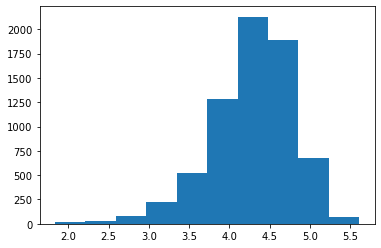

In [36]:
import matplotlib.pyplot as plt
plt.hist(list(zip(*df.cluster_feature))[0])


In [7]:
find_surface_atom_pos(df.iloc[6900]['Object'])

array([[ 4.207479, 14.305429],
       [ 4.207479, 24.403379],
       [17.671413, 14.305429],
       [21.037397,  4.207479],
       [21.037397, 21.037397]])

In [4]:
def vac_pos_to_feature(atom_object):
    z=find_vac_z(atom_object)
    mask=(atom_object.positions[:,2]==z)
    return circle_radius(atom_object.positions[mask,:])
df_vac['cluster_feature']=df_vac['Object'].apply(vac_pos_to_feature)

/var/folders/j5/vqcpn48s0jq47hcht8gnqngc0000gn/T/ipykernel_28341/1855709551.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['cluster_feature']=df_vac['Object'].apply(vac_pos_to_feature)


In [5]:
df_vac['cluster_feature']

5999    (7.838511241506247, 61.442258483219796)
6000    (7.754725211295182, 60.135763102697105)
6001      (7.77354397858463, 60.42798598698936)
6002      (7.84468270929806, 61.53904680955995)
6003    (7.808072864495561, 60.966001857271905)
                         ...                   
6994     (7.750040831241931, 60.06313288591712)
6995     (7.751988785325405, 60.09333012781084)
6996     (7.717155351402099, 59.55448671767406)
6997    (7.835184516715658, 61.390116410980774)
6998     (7.734557496972168, 59.82337967396837)
Name: cluster_feature, Length: 1000, dtype: object

In [27]:
df_vac
pd.get_dummies(df, columns=["Defect Type"]).head()

,Config Number,Defect Number,Object,Surface Energy,Defect Type_intc,Defect Type_intn,Defect Type_into,Defect Type_subc,Defect Type_subn,Defect Type_subo,Defect Type_vac
95,53,4,"(Atom('Li', [0.0, 0.0, -0.14195291], index=0),...",8.52634,0,0,0,0,0,1,0
96,102,4,"(Atom('Li', [0.0, 0.0, -0.14195291], index=0),...",7.78872,0,0,0,0,0,1,0
97,32,4,"(Atom('Li', [0.0, 0.0, -0.14195291], index=0),...",7.95204,0,0,0,0,0,1,0
98,155,4,"(Atom('Li', [0.0, 0.0, -0.14195291], index=0),...",7.88893,0,0,0,0,0,1,0
99,36,4,"(Atom('Li', [0.0, 0.0, -0.14195291], index=0),...",8.56998,0,0,0,0,0,1,0


In [4]:
df_vac.iloc[-1]['Object']

Atoms(symbols='Li635', pbc=True, cell=[26.9278678896, 26.9278678896, 26.8299179077])

In [ ]:
def vac_pos_to_feature(atom_object):
    z=find_vac_z(atom_object)
    mask=(atom_object.positions[:,2]==z)
    atom_object.positions[mask,:]
    vac_pos(atom_object)
    circle_radius(vac_pos(atom_object))

In [5]:
z=find_vac_z(df_vac.iloc[-1]['Object'])

In [11]:
mask = (df_vac.iloc[-1]['Object'].positions[:, 2] == z)
df_vac.iloc[-1]['Object'].positions[mask, :]
#grid=[]
#for i in df_vac.iloc[-1]['Object'].positions:
#    if i[2]==z:
#        grid.append(i)

array([[ 1.68299174,  1.68299174, 15.28887135],
       [ 1.68299174,  5.04897523, 15.28887135],
       [ 1.68299174,  8.41495872, 15.28887135],
       [ 1.68299174, 11.7809422 , 15.28887135],
       [ 1.68299174, 15.14692569, 15.28887135],
       [ 1.68299174, 18.51290917, 15.28887135],
       [ 1.68299174, 21.87889266, 15.28887135],
       [ 1.68299174, 25.24487615, 15.28887135],
       [ 5.04897523,  1.68299174, 15.28887135],
       [ 5.04897523,  5.04897523, 15.28887135],
       [ 5.04897523,  8.41495872, 15.28887135],
       [ 5.04897523, 11.7809422 , 15.28887135],
       [ 5.04897523, 15.14692569, 15.28887135],
       [ 5.04897523, 18.51290917, 15.28887135],
       [ 5.04897523, 21.87889266, 15.28887135],
       [ 5.04897523, 25.24487615, 15.28887135],
       [ 8.41495872,  1.68299174, 15.28887135],
       [ 8.41495872,  5.04897523, 15.28887135],
       [ 8.41495872,  8.41495872, 15.28887135],
       [ 8.41495872, 11.7809422 , 15.28887135],
       [ 8.41495872, 15.14692569, 15.288

In [12]:
vac_pos(df_vac.iloc[-1]['Object'].positions[mask, :])

array([[10.939446, 17.671413],
       [17.671413,  0.841496],
       [17.671413,  4.207479],
       [21.037397, 21.037397],
       [24.403379, 10.939446]])

In [9]:
vac_pos(grid)

array([[10.939446, 17.671413],
       [17.671413,  0.841496],
       [17.671413,  4.207479],
       [21.037397, 21.037397],
       [24.403379, 10.939446]])

In [10]:
circle_radius(vac_pos(grid))

(4.145157427093128, 17.182330095385325)